In [1]:
import sys
sys.path.insert(1, '../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
import time
importlib.reload(food_bank_functions)

np.random.seed(1)

In [2]:
problem = 'poisson'

In [3]:
loc = '../simulations/' + problem + '/'

In [4]:
plt.style.use('PaperDoubleFig.mplstyle.txt')
# Make some style choices for plotting 
colorWheel =['#2bd1e5',
            '#281bf5',
             '#db1bf5',
             '#F5CD1B',
            '#FF5733','#9cf51b',]
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]

# Scaling with n dataset

In [5]:
algos_to_exclude = ['Threshold','Expected-Filling', 'Expect-Threshold', 'Fixed-Threshold', 'Expected_Filling', 'Expect_Threshold', 'Fixed_Threshold']

In [6]:
df_one = pd.read_csv(loc+'scale_with_n.csv')

In [7]:
# algos_to_exclude = ['Threshold','Expected-Filling']
df_one = (df_one[~df_one.variable.isin(algos_to_exclude)]
                 .rename({'variable': 'Algorithm'}, axis = 1)
                )

In [8]:
df_one = df_one.sort_values(by='Algorithm')

In [9]:
df_one.Algorithm.unique()

array(['Adapt_Threshold', 'ET_Full', 'ET_Online', 'Greedy', 'Hope_Full',
       'Hope_Online', 'Max_Min'], dtype=object)

In [10]:
print(df_one.Algorithm.str.title)

<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x000001B47FE7BC48>>


In [11]:
df_one.Algorithm.unique()

array(['Adapt_Threshold', 'ET_Full', 'ET_Online', 'Greedy', 'Hope_Full',
       'Hope_Online', 'Max_Min'], dtype=object)

# Expected Waterfilling Levels

In [12]:
df_two = pd.read_csv(loc+'comparison_of_waterfilling_levels.csv')
df_two = (df_two[~df_two.variable.isin(algos_to_exclude)].rename({'variable': 'Algorithm'}, axis=1))
df_two['Algorithm'] = df_two['Algorithm'].replace({'hope_Online':'Hope-Online', 'hope_Full':'Hope-Full', 'et_Online':'ET-Online', 'et_Full':'ET-Full', 'Max_Min_Heuristic':'Max-Min'})

df_two = df_two.sort_values(by='Algorithm')
print(df_two.Algorithm.unique())

['ET_Full' 'ET_Online' 'Hope_Full' 'Hope_Online' 'Max_Min' 'True']


In [13]:
df_two.head

<bound method NDFrame.head of         Unnamed: 0  Group Algorithm    value
299999      299999     99   ET_Full  14.8848
266671      266671     71   ET_Full  18.0000
266670      266670     70   ET_Full  18.0000
266669      266669     69   ET_Full  18.0000
266668      266668     68   ET_Full  18.0000
...            ...    ...       ...      ...
466669      466669     69      True  15.0544
466670      466670     70      True  15.0544
466671      466671     71      True  15.0544
466649      466649     49      True  15.0544
400000      400000      0      True  15.2120

[600000 rows x 4 columns]>

In [14]:
df_two = df_two.sort_values(by='Algorithm')

In [15]:
df_two.Algorithm.unique()

array(['ET_Full', 'ET_Online', 'Hope_Full', 'Hope_Online', 'Max_Min',
       'True'], dtype=object)

# Group allocation difference

In [16]:
df_three = pd.read_csv(loc+'fairness_group_by_group.csv')
df_three = (df_three[~df_three.variable.isin(algos_to_exclude)]
                 .rename({'variable': 'Algorithm'}, axis = 1)
                )

In [17]:
df_three = df_three.sort_values(by='Algorithm')

In [18]:
df_three.Algorithm.unique()

array(['Adapt_Threshold', 'ET_Full', 'ET_Online', 'Greedy', 'Hope_Full',
       'Hope_Online', 'Max_Min'], dtype=object)

In [19]:
legends = False

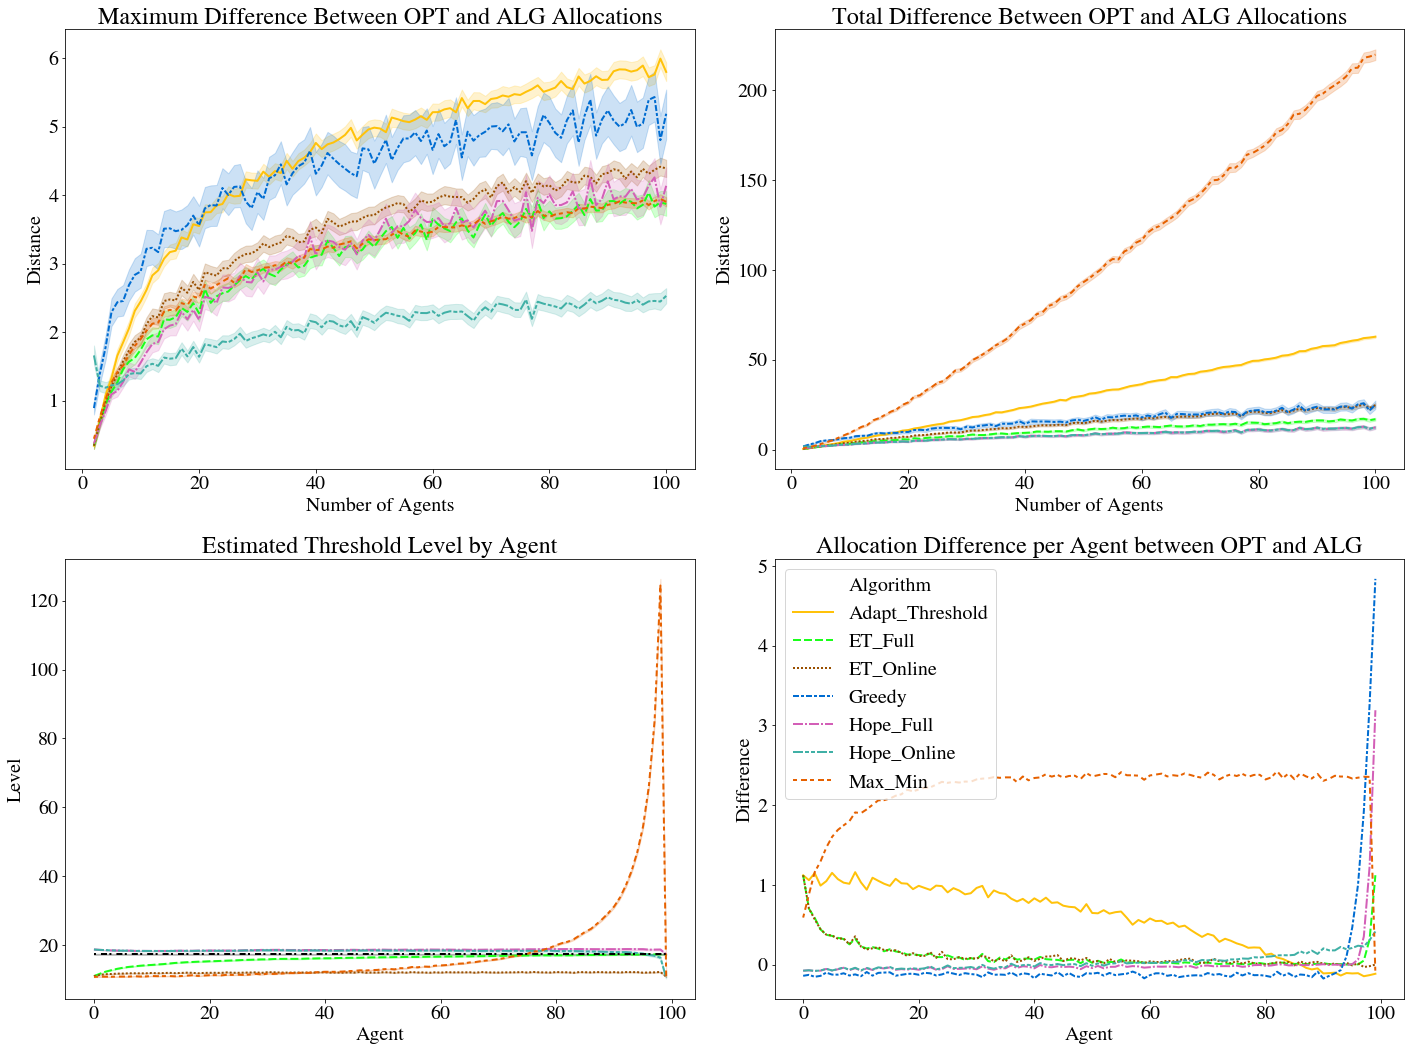

In [20]:
fig = plt.figure(figsize = (20,15))
# Create an array with the colors you want to use

colors = ["#FFC20A", "#1AFF1A", "#994F00", "#006CD1", "#D35FB7", "#40B0A6", "#E66100"]# Set your custom color palette

plt.subplot(2,2,1)

sns.set_palette(sns.color_palette(colors))
if legends:
    g = sns.lineplot(x='NumGroups', y='value', hue='Algorithm', style = 'Algorithm', dashes = dash_styles, data=df_one[df_one.Norm == 'Linf'])
else:
    g = sns.lineplot(x='NumGroups', y='value', hue='Algorithm', style = 'Algorithm', dashes = dash_styles, data=df_one[df_one.Norm == 'Linf'], legend=False)
plt.xlabel('Number of Agents')
plt.ylabel('Distance')
plt.title('Maximum Difference Between OPT and ALG Allocations')

plt.subplot(2,2,2)
sns.set_palette(sns.color_palette(colors))
if legends:
    g = sns.lineplot(x='NumGroups', y='value', hue='Algorithm', style = 'Algorithm', dashes = dash_styles, data=df_one[df_one.Norm == 'L1'])  
else:
    g = sns.lineplot(x='NumGroups', y='value', hue='Algorithm', style = 'Algorithm', dashes = dash_styles, data=df_one[df_one.Norm == 'L1'], legend=False)
plt.xlabel('Number of Agents')
plt.ylabel('Distance')
plt.title('Total Difference Between OPT and ALG Allocations')

plt.subplot(2,2,3)
new_colors = colors[1:3] + colors[4:]+['#000000']
new_dashes = dash_styles[1:3]+dash_styles[4:]
sns.set_palette(sns.color_palette(new_colors))
if legends:
    g = sns.lineplot(x='Group', y='value', style='Algorithm', hue = 'Algorithm', data=df_two, dashes=new_dashes)
else:
    g = sns.lineplot(x='Group', y='value', style='Algorithm', hue = 'Algorithm', data=df_two, dashes=new_dashes, legend=False)
plt.title('Estimated Threshold Level by Agent')
plt.xlabel('Agent')
plt.ylabel('Level')
# plt.xlabel('Estimated Level')

plt.subplot(2,2,4)
sns.set_palette(sns.color_palette(colors))

try:
    sns.lineplot(x='Agent', y='value', hue='Algorithm', data=df_three, style = 'Algorithm', dashes = dash_styles)
except ValueError:
    sns.lineplot(x='Group', y='value', hue='Algorithm', data=df_three, style = 'Algorithm', dashes = dash_styles)
plt.title('Allocation Difference per Agent between OPT and ALG')
plt.ylabel('Difference')
plt.xlabel('Agent')

plt.show()
fig.savefig(problem+'.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)

In [21]:
print(colors)

['#FFC20A', '#1AFF1A', '#994F00', '#006CD1', '#D35FB7', '#40B0A6', '#E66100']


In [22]:
print(new_colors)

['#1AFF1A', '#994F00', '#D35FB7', '#40B0A6', '#E66100', '#000000']
